In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from skimage import color
from keras.callbacks import EarlyStopping

import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score 

import csv
import math as m
l1 = 50
l2 = 40
l3 = 20


In [3]:
with open('Robot3b.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','tt3','Px','Py','T'])

  for tt1 in range(-150,151,1):
    for tt2 in range(-120,121,1):
      for tt3 in range(-90,91,1): 
        Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2)+ l3*m.cos(tt1+tt2+tt3)
        Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2)+ l3*m.sin(tt1+tt2+tt3)
        T = tt1+tt2+tt3
        writer.writerow([tt1,tt2,tt3,Px,Py,T])

In [4]:
data=pd.read_csv('Robot3b.csv')
data

x=data.drop(data.columns[:3],axis=1)
y=data.drop(data.columns[3:],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)


In [5]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(3,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               2048      
                                                                 
 dense_6 (Dense)             (None, 500)               256500    
                                                                 
 dense_7 (Dense)             (None, 300)               150300    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 3)                 303       
                                                                 
Total params: 439,251
Trainable params: 439,251
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs=5,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test,verbose=0)
print('Sai so kiem tra la:', score[0])
print('Do chinh xac kiem tra la:', score[1])


Epoch 1/5
76934/76934 [==============================] - 1402s 18ms/step - loss: -16561811707794554880.0000 - accuracy: 0.4568 - val_loss: -99950937397209858048.0000 - val_accuracy: 0.4567
Epoch 2/5
76934/76934 [==============================] - 1417s 18ms/step - loss: nan - accuracy: 0.4369 - val_loss: nan - val_accuracy: 0.3831
Epoch 3/5
76934/76934 [==============================] - 1398s 18ms/step - loss: nan - accuracy: 0.3827 - val_loss: nan - val_accuracy: 0.3831
Epoch 4/5
76934/76934 [==============================] - 1366s 18ms/step - loss: nan - accuracy: 0.3827 - val_loss: nan - val_accuracy: 0.3831
Epoch 5/5
76934/76934 [==============================] - 1331s 17ms/step - loss: nan - accuracy: 0.3827 - val_loss: nan - val_accuracy: 0.3831
Sai so kiem tra la: nan
Do chinh xac kiem tra la: 0.3830547630786896


In [7]:
model.save('Robot3b.h5')
from tensorflow.keras.models import load_model
model = load_model('Robot3b.h5')

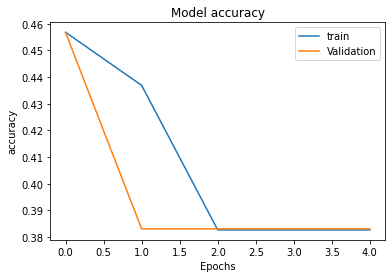

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','Validation'])
plt.show()